# Data exploration

In [1]:
import sklearn
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Dades/WNCAA df')
df.head()

,Season,DayNum,TeamIdA,ScoreA,TeamIdB,ScoreB,Round,SeedA,SeedB,WinRatioA,GapAvgA,WinRatioB,GapAvgB,SeedDiff,WinRatioDiff,GapAvgDiff,ScoreDiff,WinA
0,1998.0,137.0,3422.0,46.0,3104.0,94.0,0.0,15.0,2.0,0.703704,6.111111,0.700000,13.433333,13.0,0.003704,-7.322222,-48.0,0
1,1998.0,137.0,3112.0,75.0,3365.0,63.0,0.0,3.0,14.0,0.777778,12.407407,0.785714,17.821429,-11.0,-0.007937,-5.414021,12.0,1
2,1998.0,137.0,3163.0,93.0,3193.0,52.0,0.0,2.0,15.0,0.937500,24.875000,0.714286,5.071429,-13.0,0.223214,19.803571,41.0,1
3,1998.0,137.0,3198.0,59.0,3266.0,45.0,0.0,7.0,10.0,0.965517,25.103448,0.769231,9.538462,-3.0,0.196286,15.564987,14.0,1
4,1998.0,137.0,3208.0,72.0,3203.0,74.0,0.0,7.0,10.0,0.653846,4.730769,0.653846,9.653846,-3.0,0.000000,-4.923077,-2.0,0


In [4]:
df.isnull().sum()

Season          0
DayNum          0
TeamIdA         0
ScoreA          0
TeamIdB         0
ScoreB          0
Round           0
SeedA           0
SeedB           0
WinRatioA       0
GapAvgA         0
WinRatioB       0
GapAvgB         0
SeedDiff        0
WinRatioDiff    0
GapAvgDiff      0
ScoreDiff       0
WinA            0
dtype: int64

No hi ha cap valor nul. 

In [5]:
df.describe()

,Season,DayNum,TeamIdA,ScoreA,TeamIdB,ScoreB,Round,SeedA,SeedB,WinRatioA,GapAvgA,WinRatioB,GapAvgB,SeedDiff,WinRatioDiff,GapAvgDiff,ScoreDiff,WinA
count,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000
mean,2008.500000,140.744589,3284.209957,67.961760,3288.388167,67.126984,1.379509,6.034632,6.585859,0.781431,13.036432,0.780853,12.976738,-0.551227,0.000578,0.059694,0.834776,0.504329
std,6.346579,4.066912,98.134432,14.261735,99.439088,13.520079,1.549747,4.353209,4.628454,0.109098,7.045301,0.111005,7.427716,7.399623,0.167235,10.637740,20.825893,0.500162
min,1998.000000,137.000000,3103.000000,27.000000,3101.000000,26.000000,0.000000,1.000000,1.000000,0.433333,-5.593750,0.451613,-4.451613,-15.000000,-0.515152,-41.878788,-89.000000,0.000000
25%,2003.000000,138.000000,3201.000000,58.000000,3203.000000,58.000000,0.000000,2.000000,3.000000,0.700000,7.967187,0.700000,7.964881,-5.000000,-0.115153,-6.568222,-13.000000,0.000000
50%,2008.500000,139.000000,3280.000000,67.500000,3292.000000,67.000000,1.000000,5.000000,5.500000,0.777778,12.254032,0.774194,12.060606,-1.000000,0.000000,0.047366,1.000000,1.000000
75%,2014.000000,141.000000,3374.000000,77.000000,3380.000000,76.000000,2.000000,9.000000,10.000000,0.870968,16.852535,0.870968,16.820699,5.000000,0.113839,6.215070,15.000000,1.000000
max,2019.000000,155.000000,3462.000000,140.000000,3464.000000,119.000000,6.000000,16.000000,16.000000,1.000000,42.060606,1.000000,42.060606,15.000000,0.548387,40.157495,88.000000,1.000000


les estadistiques de teamIDA TeamIDB no tenen sentit

In [6]:
wins=df.groupby(df['WinA']==1)
wins.size()

WinA
False    687
True     699
dtype: int64

Hi ha un total de 1386 partits del torneig representats, desde la temporada del 1998 fins el 2019. 

681 partits són guanyats, 705 són perduts. 

## Normalització de les dades:

In [7]:
from sklearn import preprocessing as skpre
df_minmax = skpre.minmax_scale(df)
df_scaled=pd.DataFrame(df_minmax, columns=df.columns)

## PCA

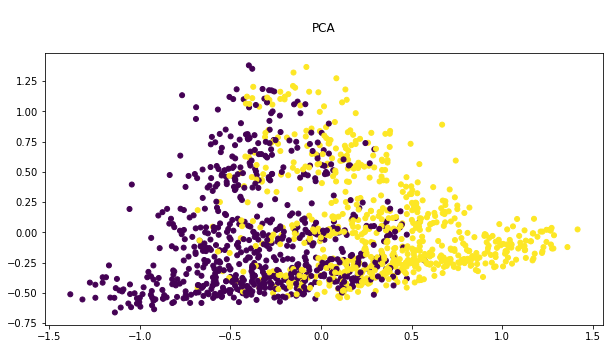

explained variance ratio[3.22753601e-01 2.26151185e-01 1.14418136e-01 9.64315406e-02
 8.94151259e-02 5.47973792e-02 3.15582121e-02 2.02056870e-02
 1.64448449e-02 1.36229255e-02 7.38986747e-03 5.10842271e-03
 1.70307200e-03 3.57674710e-32 1.48818531e-32 9.78651274e-33
 2.62904902e-33]
explained variance ratio cumulative [0.3227536  0.54890479 0.66332292 0.75975446 0.84916959 0.90396697
 0.93552518 0.95573087 0.97217571 0.98579864 0.99318851 0.99829693
 1.         1.         1.         1.         1.        ]


In [9]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_scaled.iloc[:,:-1])
df_pca = pca.transform(df_scaled.iloc[:,:-1])

fig1, ax1 =plt.subplots(figsize=(10,5))
ax1.scatter(df_pca[:,0],df_pca[:,1], c=df['WinA'], s=25)
ax1.set_title('\n'+'PCA'+'\n', size=12)
plt.show()

prin_comps = pca.components_
expl_var = pca.explained_variance_
expl_var_r = pca.explained_variance_ratio_
expl_var_r_cumsum = np.cumsum(expl_var_r)

print('explained variance ratio' +  str(expl_var_r))
print('explained variance ratio cumulative ' + str(expl_var_r_cumsum))

De la PCA mostrada, de primeres s'intueix una disposició piramidal de punts i una possible simetria. També s'observa que respecte l'eix horitzontal es separen molt bé els partits guanyats/perduts.

El primer eix explica el 31,2% de la variància, i tal i com s'observa al gràfic, com més a la dreta d'aquest eix, més probabilitat hi ha de guanyar el partit.

El segon eix explica el 23,15% de la variància, però en la direcció vertical del gràfic puc observar que no hi ha distinció entre els dos colors, tot i que sí que destaca que com més amunt, molts menys punts hi ha. 

<function matplotlib.pyplot.show(close=None, block=None)>

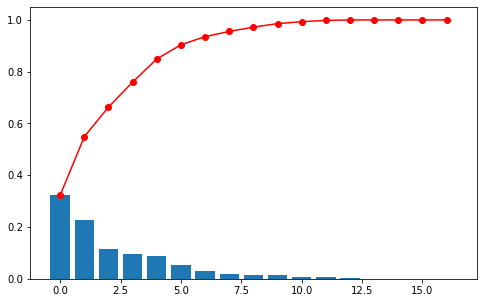

In [10]:
fig2,  ax  = plt.subplots(figsize=(8,5))
x= np.arange(17)
ax.bar(x, expl_var_r)
ax.plot(x, expl_var_r_cumsum, color='red', marker='o')
plt.show

Els dos primers principals components junts, expliquen el 55% de la variància. No hi ha cap colze clar, els següents 3 expliquen aproximadament el mateix. 

In [11]:
print ('primer eix: ' + str(prin_comps[0]))
print  ('segon eix: ' + str(prin_comps[1]))

primer eix: [ 0.02874631 -0.09109048 -0.01669248  0.14290293  0.01523681 -0.17905734
 -0.10258209 -0.38934856  0.52013254  0.19062905  0.14689018 -0.25950643
 -0.20622953 -0.45474055  0.23537754  0.2022538   0.18531279]
segon eix: [ 0.03678905  0.49193299  0.01019826  0.03510034 -0.06863449 -0.02371692
  0.56632784 -0.43863218 -0.27190606  0.24539262  0.20338256  0.1622886
  0.15405173 -0.08336306  0.0470682   0.03080072  0.03487013]


Els atributs amb més influencia sobre el primer eix són: SeedA(-), SeedB i SeedDif(-). És a dir, com més petita la Seed de l'equip A, més gran la Seed de l'equip B i més gran la diferencia de Seeds entre aquests dos equips,  més probabilitats té l'equip A de guanyar el partit. Té sentit, ja que com, recordem, més petita és la Seed de l'equip, vol dir que més ben valorat està l'equip segons la temporada ha fet aquest. 

Els atributs amb més influència sobre el segon eix són: DayNum i Round, això explica la forma piramidal del gràfic. Ja que a les primeres rondes del torneig (menor numero a Round) més partit s'han jugat, per tant, més victories i derrotes es dibuixen. 

D'aquesta manera, puc observar, que els equips que  més endavant de la competició arriben són aquells amb unes Seeds més similars, segurament, les dues baixetes. 

### Seeds

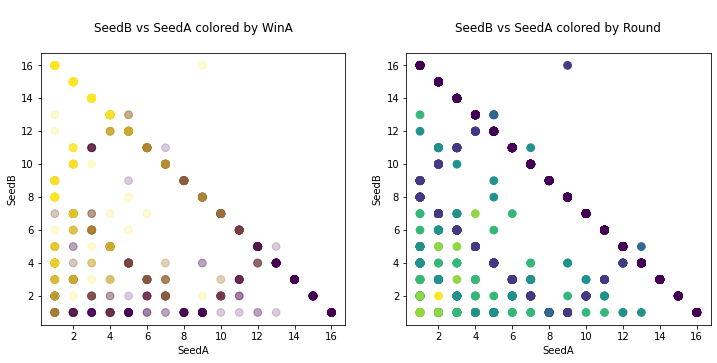

In [12]:
fig3, (ax3, ax4) = plt.subplots(1, 2, figsize=(12,5))
ax3.scatter(df['SeedA'],df['SeedB'], c=df['WinA'], s=60, alpha=0.2)
ax3.set_title('\n'+'SeedB vs SeedA colored by WinA'+'\n', size=12)
ax3.set_xlabel('SeedA')
ax3.set_ylabel('SeedB')

ax4.scatter(df['SeedA'],df['SeedB'], c=df['Round'], s=60, alpha=1)
ax4.set_title('\n'+'SeedB vs SeedA colored by Round'+'\n', size=12)
ax4.set_xlabel('SeedA')
ax4.set_ylabel('SeedB')

plt.show()

La diagonal clara és la primera ronda que juguen 1vs16, 2vs15... i quasi sempre guanya l'equip amb la seed més petita, per això s'observa un degradat en el gràfic de l'esquerra que està pintat segons si l'equip A guanya (groc). 

Només sobreviuen els equips de Seed petita.

## Estabilitats dels equips en quant a Seeds

In [13]:
equips = pd.read_csv('Dades/WTeams.csv')
seeds =pd.read_csv('Dades/WNCAATourneySeeds.csv')

In [14]:
equips.head()

,TeamID,TeamName
0,3101,Abilene Chr
1,3102,Air Force
2,3103,Akron
3,3104,Alabama
4,3105,Alabama A&M


In [15]:
import re
def treat_seed(seed):
    return int(re.sub("[^0-9]", "", seed))

In [16]:
seeds['Seed'] = seeds['Seed'].apply(treat_seed)

In [17]:
seeds.head()

,Season,Seed,TeamID
0,1998,1,3330
1,1998,2,3163
2,1998,3,3112
3,1998,4,3301
4,1998,5,3272


In [18]:
seeds_equips = seeds.merge(equips, on='TeamID', how='left')
seeds1 = seeds_equips[seeds_equips['Seed'] == 1]
llista_seeds1 = seeds1['TeamName'].unique()
llista_seeds1

array(['Old Dominion', 'Texas Tech', 'Tennessee', 'Stanford',
       'Connecticut', 'Purdue', 'Louisiana Tech', 'Georgia', 'Notre Dame',
       'Duke', 'Oklahoma', 'Vanderbilt', 'LSU', 'Penn St', 'Texas',
       'North Carolina', 'Michigan St', 'Ohio St', 'Maryland', 'Nebraska',
       'Baylor', 'South Carolina', 'Mississippi St', 'Louisville',
       'NC State'], dtype=object)

In [19]:
a= seeds1.groupby(by=["TeamName"]).count().sort_values(['Seed'], ascending=False)
a['Times in Seed 1']=a['Season']
a.drop(['Season', 'Seed', 'TeamID'], axis=1, inplace=True)
a

,Times in Seed 1
TeamName,
Connecticut,18
Tennessee,12
Notre Dame,9
Duke,7
Baylor,6
Stanford,6
South Carolina,5
North Carolina,4
Maryland,3


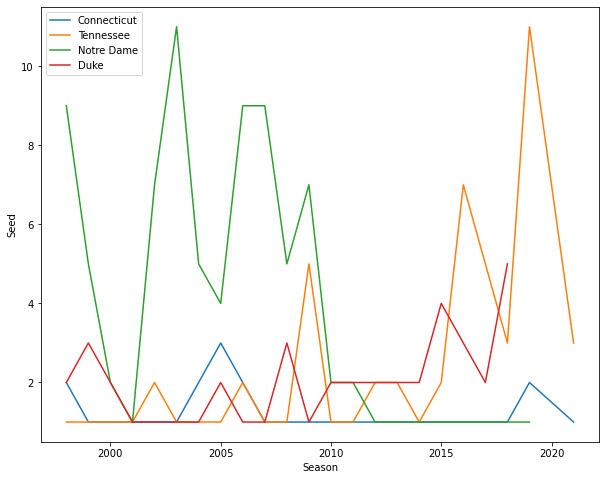

In [20]:
top4= seeds_equips.loc[seeds_equips.TeamName.isin(['Connecticut', 'Tennessee', 'Notre Dame', 'Duke' ])]

top4_equips=['Connecticut', 'Tennessee', 'Notre Dame', 'Duke' ]
plt.figure(figsize=(10, 8))
for equip in top4_equips:
     selected_data = top4.loc[top4['TeamName'] == equip]
     plt.plot(selected_data['Season'], selected_data['Seed'], label=equip)

plt.ylabel('Seed')
plt.xlabel('Season')

plt.legend()
plt.show()

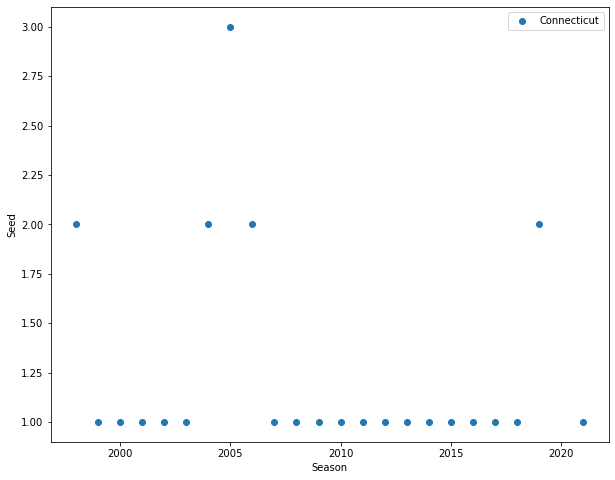

In [21]:
top1= seeds_equips.loc[seeds_equips.TeamName.isin(['Connecticut'])]

top4_equips=['Connecticut']
plt.figure(figsize=(10, 8))
for equip in top4_equips:
     selected_data = top4.loc[top4['TeamName'] == equip]
     plt.scatter(selected_data['Season'], selected_data['Seed'], label=equip)
plt.ylabel('Seed')
plt.xlabel('Season')    
plt.legend()
plt.show()
